# Market Overview & Risk Analysis — S&P 500

**Objective:**  
To analyze historical equity index data using return-based statistics and standard risk metrics commonly used in quantitative finance.

**Key Focus Areas:**  
- Returns & volatility  
- Drawdowns  
- Risk-adjusted performance  

This notebook demonstrates applied Python, statistics, and financial reasoning.


In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.style.use("default")


In [24]:
symbol = "^GSPC"
data = yf.download(symbol, start="2015-01-01", auto_adjust=True)

# Basic data checks
data = data.dropna()
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000


### Dataset Summary

We use adjusted daily price data to ensure returns correctly reflect total market movement.
The analysis period starts in 2015 to capture multiple market regimes:
- Bull markets
- COVID crash
- High-inflation period


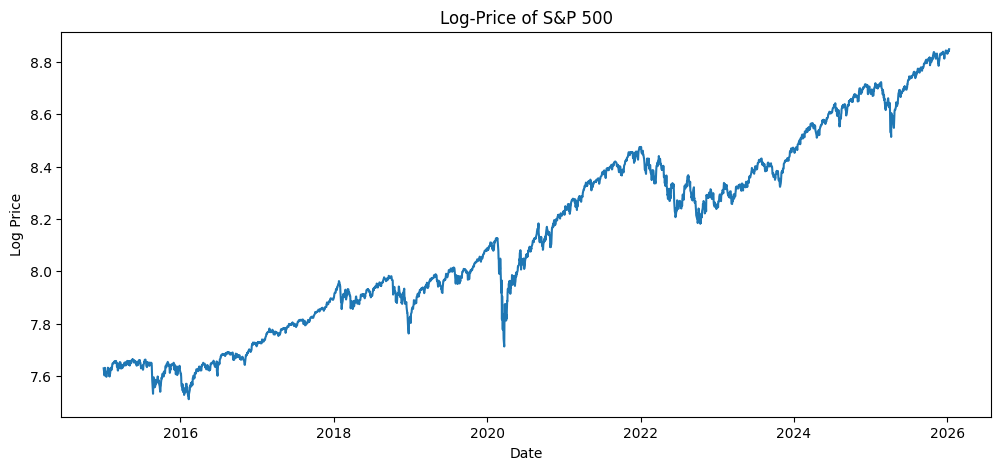

In [25]:
plt.figure(figsize=(12,5))
plt.plot(np.log(data['Close']))
plt.title("Log-Price of S&P 500")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.show()


### Daily Returns

Returns are analyzed instead of prices because:
- Returns are stationary (prices are not)
- Risk is defined in return space
- Most quantitative strategies operate on returns
- Adjusted prices account for dividends and splits and are required for accurate return calculations.

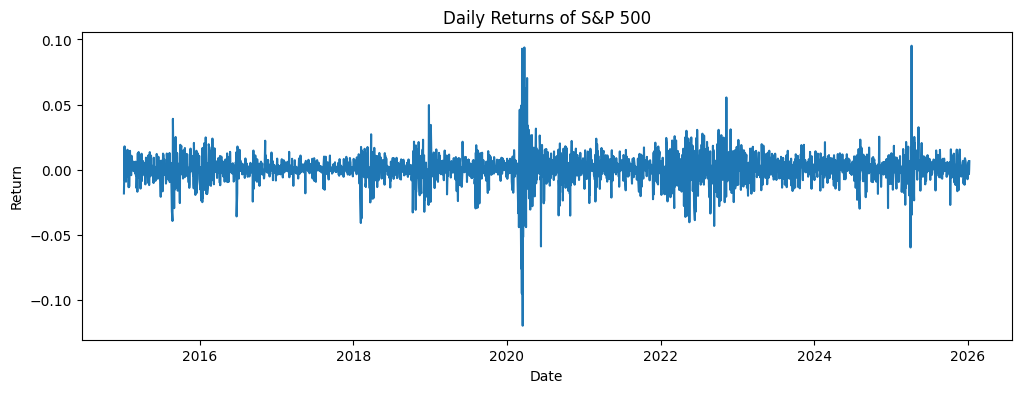

In [26]:
data['Returns'] = data['Close'].pct_change()

plt.figure(figsize=(12,4))
plt.plot(data['Returns'])
plt.title("Daily Returns of S&P 500")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()


### Return Statistics

We compute key descriptive statistics to understand return distribution.


In [27]:
stats = {
    "Mean Daily Return": data['Returns'].mean(),
    "Volatility (Std)": data['Returns'].std(),
    "Skewness": data['Returns'].skew(),
    "Kurtosis": data['Returns'].kurtosis()
}

pd.Series(stats)


Mean Daily Return     0.000504
Volatility (Std)      0.011272
Skewness             -0.364731
Kurtosis             15.126114
dtype: float64

### Annualized Risk Metrics

Annualized metrics assume 252 trading days.  

Sharpe Ratio is computed assuming a zero risk-free rate for simplicity.


In [28]:
annualized_return = data['Returns'].mean() * 252
annualized_vol = data['Returns'].std() * np.sqrt(252)
risk_free_rate = 0.0
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_vol


pd.Series({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_vol,
    "Sharpe Ratio": sharpe_ratio
})


Annualized Return        0.126963
Annualized Volatility    0.178936
Sharpe Ratio             0.709540
dtype: float64

### Drawdown Analysis

Drawdowns capture downside risk ignored by volatility.


Maximum Drawdown: -33.92%


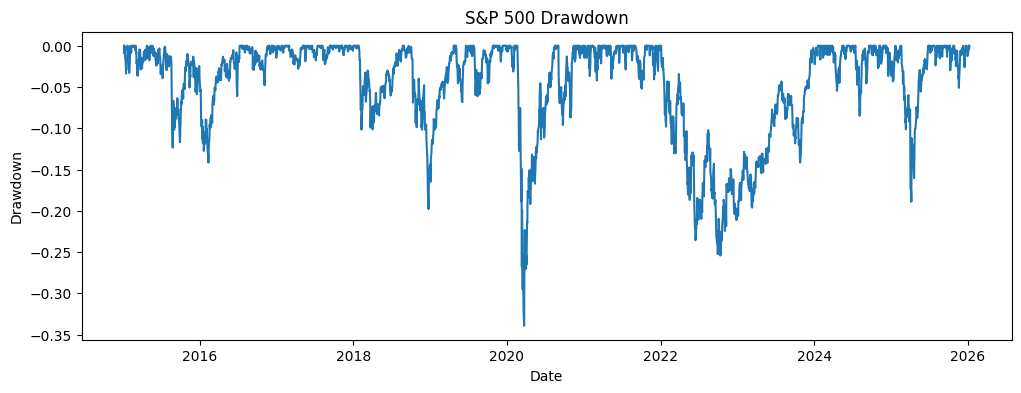

np.float64(-0.3392496000265331)

In [29]:
cum_returns = (1 + data['Returns']).cumprod()
rolling_max = cum_returns.cummax()
drawdown = (cum_returns - rolling_max) / rolling_max
max_dd = drawdown.min()
print(f"Maximum Drawdown: {max_dd:.2%}")


plt.figure(figsize=(12,4))
plt.plot(drawdown)
plt.title("S&P 500 Drawdown")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()

drawdown.min()


### Rolling volatility

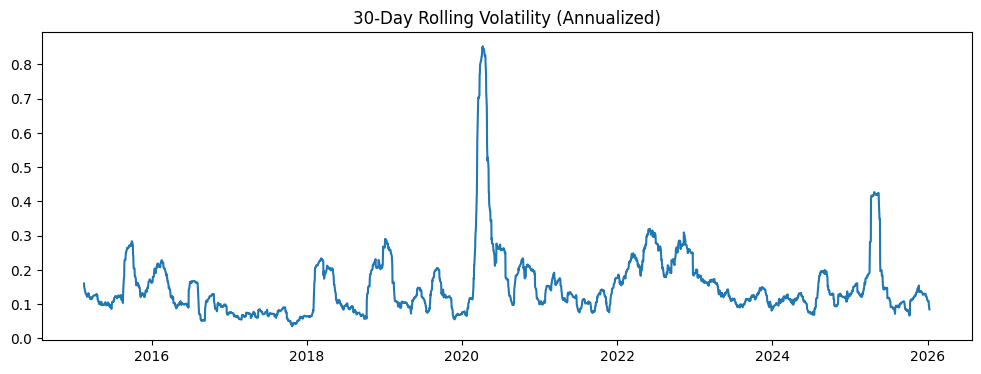

In [30]:
data['RollingVol_30'] = data['Returns'].rolling(30).std() * np.sqrt(252)

plt.figure(figsize=(12,4))
plt.plot(data['RollingVol_30'])
plt.title("30-Day Rolling Volatility (Annualized)")
plt.show()


### Histogram of returns

The distribution exhibits fat tails and negative skewness, highlighting the presence of extreme downside events not captured by normal assumptions.

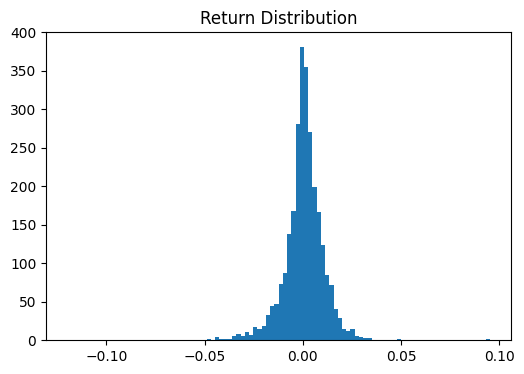

In [31]:
plt.figure(figsize=(6,4))
plt.hist(data['Returns'], bins=100)
plt.title("Return Distribution")
plt.show()


### Interpretation

- Volatility clustering confirms non-constant variance in equity returns
- Drawdowns highlight asymmetric downside risk

- Risk-adjusted performance varies significantly across regimes

- Simple descriptive statistics already reveal meaningful market structure

